In [6]:
import os
import jax
import pickle

os.environ['XLA_FLAGS'] = '--xla_force_host_platform_device_count=24'
jax.config.update('jax_platform_name', 'cpu')

#from jax.config import config; config.update("jax_enable_x64", True)

%load_ext autoreload
%autoreload 2

from brax import envs
from brax.io import html
from brax.training import normalization

import flax
import jax.numpy as jnp
from brax.envs import create_fn

from IPython.display import HTML, clear_output

import optax

import matplotlib.pyplot as plt
import numpy as np

from controllers import GruController, MlpController, LinearController

from common import do_local_apg, add_guassian_noise, add_guassian_noise_mixed_std, do_one_rollout, cem_apg

from functools import partial



def visualize(sys, qps, height=480):
  """Renders a 3D visualization of the environment."""
  return HTML(html.render(sys, qps, height=height))

len(jax.devices())

save_dir = "save_1"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


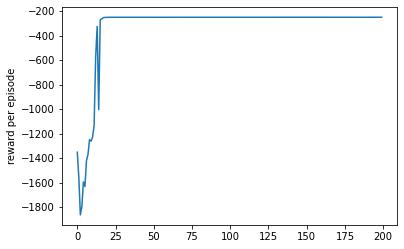

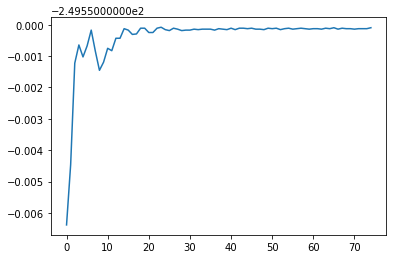

 Iteration 199 --------------------------------
0 : reward: -288.130126953125 -> -288.31036376953125
1 : reward: -249.77102661132812 -> -249.60592651367188
2 : reward: -269.1222229003906 -> -269.2881164550781
3 : reward: -269.4325256347656 -> -269.4276123046875
4 : reward: -385.27685546875 -> -382.77044677734375
5 : reward: -288.2308044433594 -> -287.966796875
6 : reward: -269.8790588378906 -> -269.4938659667969
7 : reward: -288.47613525390625 -> -288.15887451171875
---
8 : reward: -250.04669189453125 -> -250.03627014160156
9 : reward: -288.02728271484375 -> -288.0309143066406
10 : reward: -382.34234619140625 -> -383.1434326171875
11 : reward: -249.59310913085938 -> -249.71669006347656
12 : reward: -249.914794921875 -> -250.3018798828125
13 : reward: -249.88836669921875 -> -252.2447967529297
14 : reward: -249.59536743164062 -> -249.7327880859375
15 : reward: -249.80923461914062 -> -249.80711364746094
16 : reward: -269.24798583984375 -> -269.37835693359375
17 : reward: -269.257232666015

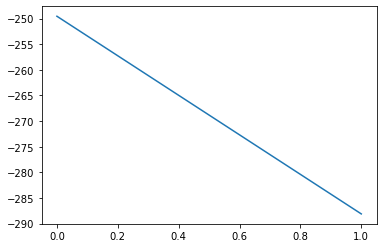

In [7]:
env_name = "inverted_pendulum_swingup"  # @param ['ant', 'humanoid', 'fetch', 'grasp', 'halfcheetah', 'walker2d, 'ur5e', 'reacher', bball_1dof]

episode_length = 500
action_repeat = 1
env_fn = create_fn(env_name = env_name, action_repeat=action_repeat, batch_size=None, auto_reset=False)
env = env_fn()



policy_size = int(2**jnp.ceil(jnp.log2(env.observation_size*4)))
print(policy_size)
policy = GruController(env.observation_size, env.action_size, 32)

for i in range(8):
    normalizer_params, policy_params, rewards = cem_apg(env_fn,
                                                        200,
                                                        key=jax.random.PRNGKey(i),
                                                        episode_length = episode_length,
                                                        action_repeat = action_repeat,
                                                        apg_epochs = 75,
                                                        cem_epochs = 1,
                                                        batch_size = 1,
                                                        truncation_length = None,
                                                        learning_rate = 5e-4,
                                                        clipping = 1e9,
                                                        initial_std = 0.001,
                                                        num_elite = 8,
                                                        eps = 0.0,
                                                        normalize_observations=True,
                                                        policy = policy
                                                       )



    pickle.dump(policy_params, open(f"{save_dir}/{env_name}_policy{i}.pkl", 'wb'))
    pickle.dump(normalizer_params, open(f"{save_dir}/{env_name}_normalize{i}.pkl", 'wb'))
    pickle.dump(rewards, open(f"{save_dir}/{env_name}_rewards.pkl{i}", 'wb'))

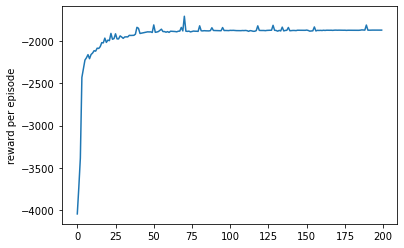

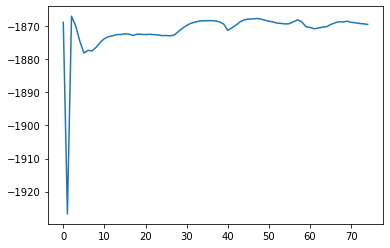

 Iteration 199 --------------------------------
0 : reward: -1869.0087890625 -> -1875.0516357421875
1 : reward: -1874.6455078125 -> -1866.1007080078125
2 : reward: -1872.5517578125 -> -1905.5146484375
3 : reward: -1875.9970703125 -> -1874.755859375
4 : reward: -1872.31201171875 -> -1828.31982421875
5 : reward: -1877.3895263671875 -> -1872.50341796875
6 : reward: -1888.9654541015625 -> -1872.107177734375
7 : reward: -1877.2532958984375 -> -1873.78271484375
---
8 : reward: -1869.17578125 -> -1871.3294677734375
9 : reward: -1881.9576416015625 -> -1870.7236328125
10 : reward: -1882.29248046875 -> -1871.8857421875
11 : reward: -1873.8837890625 -> -1932.5860595703125
12 : reward: -1877.141357421875 -> -1874.8800048828125
13 : reward: -1871.6278076171875 -> -1882.744873046875
14 : reward: -1871.350341796875 -> -1883.9356689453125
15 : reward: -1873.11865234375 -> -1874.1871337890625
16 : reward: -1876.5394287109375 -> -1867.6461181640625
17 : reward: -1880.59912109375 -> -1872.81494140625
18 

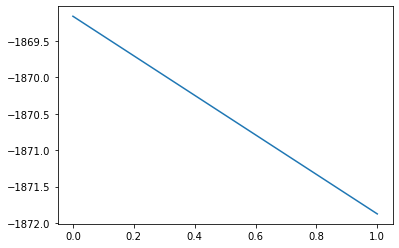

In [8]:
env_name = "acrobot"  # @param ['ant', 'humanoid', 'fetch', 'grasp', 'halfcheetah', 'walker2d, 'ur5e', 'reacher', bball_1dof]

episode_length = 500
action_repeat = 1
env_fn = create_fn(env_name = env_name, action_repeat=action_repeat, batch_size=None, auto_reset=False)
env = env_fn()



policy_size = int(2**jnp.ceil(jnp.log2(env.observation_size*4)))
print(policy_size)
policy = GruController(env.observation_size, env.action_size, 32)

for i in range(8):
    normalizer_params, policy_params, rewards = cem_apg(env_fn,
                                                        200,
                                                        key=jax.random.PRNGKey(i),
                                                        episode_length = episode_length,
                                                        action_repeat = action_repeat,
                                                        apg_epochs = 75,
                                                        cem_epochs = 1,
                                                        batch_size = 1,
                                                        truncation_length = None,
                                                        learning_rate = 5e-4,
                                                        clipping = 1e9,
                                                        initial_std = 0.01,
                                                        num_elite = 8,
                                                        eps = 0.0,
                                                        normalize_observations=True,
                                                        policy = policy
                                                       )



    pickle.dump(policy_params, open(f"{save_dir}/{env_name}_policy{i}.pkl", 'wb'))
    pickle.dump(normalizer_params, open(f"{save_dir}/{env_name}_normalize{i}.pkl", 'wb'))
    pickle.dump(rewards, open(f"{save_dir}/{env_name}_rewards.pkl{i}", 'wb'))

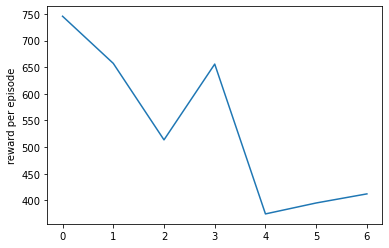

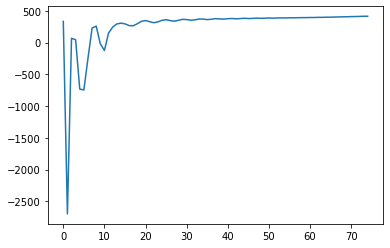

 Iteration 6 --------------------------------
0 : reward: 173.03187561035156 -> -785.2266235351562
1 : reward: 299.6970520019531 -> 242.49374389648438
2 : reward: 343.6680603027344 -> 78.90853881835938
3 : reward: -356.17578125 -> 318.57635498046875
4 : reward: 264.37213134765625 -> -296.2687072753906
5 : reward: -1530.6209716796875 -> 303.914794921875
6 : reward: -198.8551025390625 -> 333.7662353515625
7 : reward: 141.1343994140625 -> 228.33200073242188
---
8 : reward: 334.29229736328125 -> 263.2922058105469
9 : reward: 346.99102783203125 -> -376.46539306640625
10 : reward: -50.048397064208984 -> 363.88861083984375
11 : reward: 337.75006103515625 -> 298.90704345703125
12 : reward: 257.6463623046875 -> 390.9388427734375
13 : reward: 268.0306396484375 -> -120.29451751708984
14 : reward: 235.29739379882812 -> 292.9067077636719
15 : reward: -3252.049072265625 -> 388.1455383300781
16 : reward: 132.357177734375 -> 101.92321014404297
17 : reward: -12.916358947753906 -> 340.4349670410156
18 :

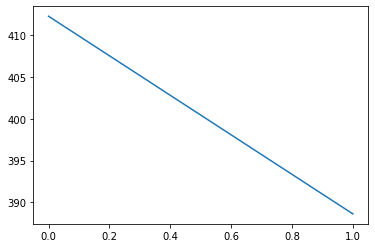

5
6


In [ ]:
env_name = "inverted_double_pendulum_swingup"  # @param ['ant', 'humanoid', 'fetch', 'grasp', 'halfcheetah', 'walker2d, 'ur5e', 'reacher', bball_1dof]

episode_length = 500
action_repeat = 1
env_fn = create_fn(env_name = env_name, action_repeat=action_repeat, batch_size=None, auto_reset=False)
env = env_fn()



policy_size = int(2**jnp.ceil(jnp.log2(env.observation_size*4)))
print(policy_size)
policy = GruController(env.observation_size, env.action_size, 128)

for i in range(8):
    normalizer_params, policy_params, rewards = cem_apg(env_fn,
                                                        200,
                                                        key=jax.random.PRNGKey(i),
                                                        episode_length = episode_length,
                                                        action_repeat = action_repeat,
                                                        apg_epochs = 75,
                                                        cem_epochs = 1,
                                                        batch_size = 1,
                                                        truncation_length = None,
                                                        learning_rate = 5e-4,
                                                        clipping = 1e9,
                                                        initial_std = 0.01,
                                                        num_elite = 8,
                                                        eps = 0.0,
                                                        normalize_observations=True,
                                                        policy = policy
                                                       )



    pickle.dump(policy_params, open(f"{save_dir}/{env_name}_policy{i}.pkl", 'wb'))
    pickle.dump(normalizer_params, open(f"{save_dir}/{env_name}_normalize{i}.pkl", 'wb'))
    pickle.dump(rewards, open(f"{save_dir}/{env_name}_rewards.pkl{i}", 'wb'))

In [17]:
import pickle
pickle.dump(policy_params2, open("inverted_double_pendulum_swingup.pickle", 'wb'))

In [22]:
env_name = "inverted_double_pendulum_swingup"
pickle.dump(policy_params2, open(f"{env_name}_policy.pkl", 'wb'))
pickle.dump(normalizer_params2, open(f"{env_name}_normalize.pkl", 'wb'))
pickle.dump(rewards2, open(f"{env_name}_rewards.pkl", 'wb'))